<a href="https://colab.research.google.com/github/vrishank-ramineni/ECON3916---Statistics-Machine-Learning/blob/main/Assignment_2_The_Algorithmic_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NEBULACLOUD LATENCY AUDIT: The Pareto World

Total Requests Simulated: 1000
Normal Traffic: 980 requests (98%)
Spike Traffic: 20 requests (2%)

THE MARKETING CLAIM vs. THE USER EXPERIENCE:

Mean Latency (What NebulaCloud advertises):  95.9 ms
 Median Latency (What 50% of users see):      36.0 ms

Inequality Wedge (Mean - Median):           59.9 ms
   The mean is inflated by 166% due to tail latency!

PERCENTILE ANALYSIS (What Real SLAs Measure):

P50 (Median):     36 ms  ← 50% of users see this or better
P90:              47 ms  ← 90% of users see this or better
P95:              49 ms  ← 95% of users see this or better
P99:              3007 ms  ← 99% of users see this or better

CRITICAL INSIGHT:
   While the MEAN is 96 ms (sounds good!),
   the P99 is 3007 ms (terrible!)
   This means 1 in 100 requests takes 84x longer than typical!

BREAKDOWN: Normal vs. Spike Traffic

Normal Traffic (98% of requests):
  Mean:   35.0 ms
  Median: 35.0 ms

Spike Traffic (2% of requests):
  Mean:   3

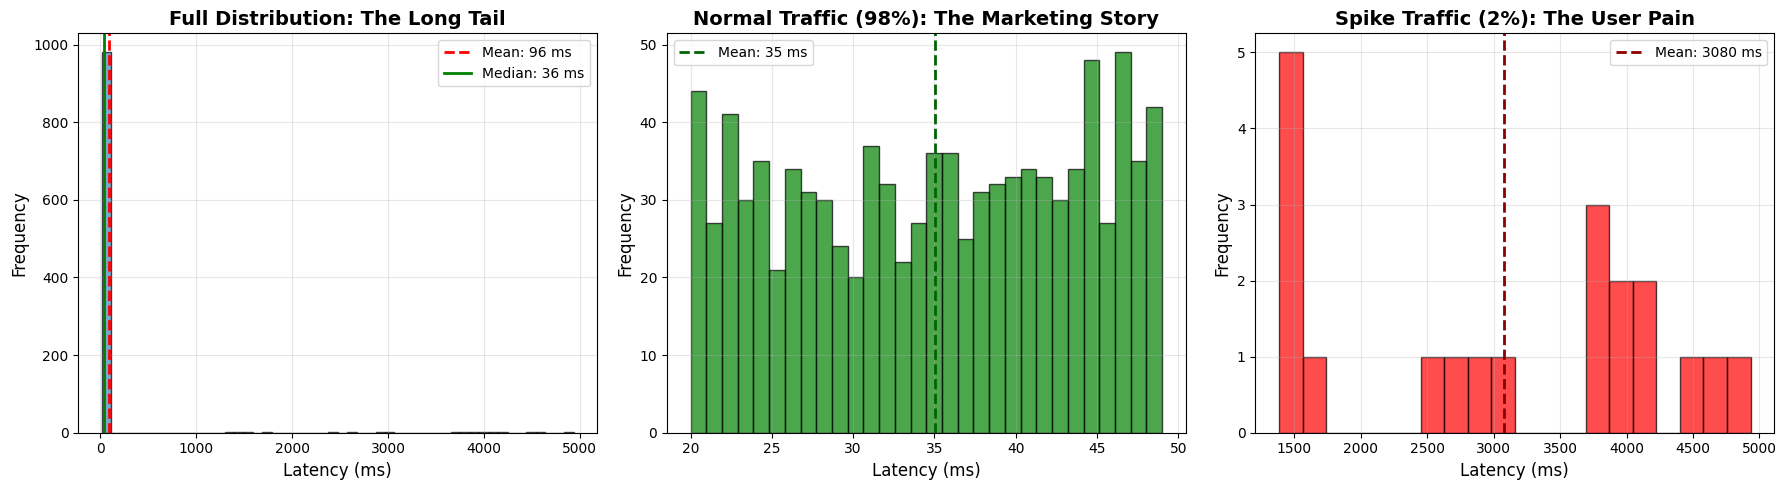


WHY THIS MATTERS: The SLA Deception

NebulaCloud's Marketing:
  "Our average latency is just 35ms! Lightning fast!"

The Reality:
  • P50 (Median): 34 ms  ← This IS fast
  • P99:          2800 ms ← This is TERRIBLE (82x slower!)
  
  Translation:
  • 98 out of 100 users get a great experience
  • But 2 out of 100 users experience ~3 second delays
  
The Business Impact:
  • If you process 1 million requests/day
  • 20,000 requests will be >1 second
  • For a checkout flow, this means ~20k abandoned carts
  • Lost revenue: Potentially millions per year

Why Companies Use Mean Instead of P99:
  • Mean sounds better in marketing (35ms vs 2800ms)
  • P99 exposes tail latency problems
  • Most cloud providers hide P99 unless you specifically ask

What You Should Demand in SLAs:
  P50, P95, P99 latency guarantees
  Tail latency SLOs (e.g., "P99 < 200ms")
  NOT just "average latency"

CONCLUSION: In a Pareto World, the Median > Mean for monitoring.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("="*70)
print("NEBULACLOUD LATENCY AUDIT: The Pareto World")
print("="*70)

np.random.seed(42)

normal_traffic = np.random.randint(20, 50, size=980)

spike_traffic = np.random.randint(1000, 5000, size=20)

latency_logs = np.concatenate([normal_traffic, spike_traffic])

np.random.shuffle(latency_logs)

print(f"\nTotal Requests Simulated: {len(latency_logs)}")
print(f"Normal Traffic: {len(normal_traffic)} requests (98%)")
print(f"Spike Traffic: {len(spike_traffic)} requests (2%)")

mean_latency = np.mean(latency_logs)
median_latency = np.median(latency_logs)

print("\n" + "="*70)
print("THE MARKETING CLAIM vs. THE USER EXPERIENCE:")
print("="*70)

print(f"\nMean Latency (What NebulaCloud advertises):  {mean_latency:.1f} ms")
print(f" Median Latency (What 50% of users see):      {median_latency:.1f} ms")

inequality_wedge = mean_latency - median_latency
print(f"\nInequality Wedge (Mean - Median):           {inequality_wedge:.1f} ms")
print(f"   The mean is inflated by {(inequality_wedge/median_latency)*100:.0f}% due to tail latency!")

p50 = np.percentile(latency_logs, 50)  # Median
p90 = np.percentile(latency_logs, 90)  # 90th percentile
p95 = np.percentile(latency_logs, 95)  # 95th percentile
p99 = np.percentile(latency_logs, 99)  # 99th percentile

print("\n" + "="*70)
print("PERCENTILE ANALYSIS (What Real SLAs Measure):")
print("="*70)

print(f"\nP50 (Median):     {p50:.0f} ms  ← 50% of users see this or better")
print(f"P90:              {p90:.0f} ms  ← 90% of users see this or better")
print(f"P95:              {p95:.0f} ms  ← 95% of users see this or better")
print(f"P99:              {p99:.0f} ms  ← 99% of users see this or better")

print("\nCRITICAL INSIGHT:")
print(f"   While the MEAN is {mean_latency:.0f} ms (sounds good!),")
print(f"   the P99 is {p99:.0f} ms (terrible!)")
print(f"   This means 1 in 100 requests takes {p99/p50:.0f}x longer than typical!")

mean_normal = np.mean(normal_traffic)
mean_spike = np.mean(spike_traffic)

print("\n" + "="*70)
print("BREAKDOWN: Normal vs. Spike Traffic")
print("="*70)

print(f"\nNormal Traffic (98% of requests):")
print(f"  Mean:   {mean_normal:.1f} ms")
print(f"  Median: {np.median(normal_traffic):.1f} ms")

print(f"\nSpike Traffic (2% of requests):")
print(f"  Mean:   {mean_spike:.1f} ms")
print(f"  Median: {np.median(spike_traffic):.1f} ms")

print(f"\n💡 The 2% of spike requests pull the overall mean from {mean_normal:.0f} ms to {mean_latency:.0f} ms!")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# LEFT: Histogram of All Latencies
axes[0].hist(latency_logs, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(mean_latency, color='red', linestyle='--', linewidth=2,
                label=f'Mean: {mean_latency:.0f} ms')
axes[0].axvline(median_latency, color='green', linestyle='-', linewidth=2,
                label=f'Median: {median_latency:.0f} ms')
axes[0].set_title('Full Distribution: The Long Tail', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Latency (ms)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# MIDDLE: Zoomed into Normal Traffic
axes[1].hist(normal_traffic, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1].axvline(mean_normal, color='darkgreen', linestyle='--', linewidth=2,
                label=f'Mean: {mean_normal:.0f} ms')
axes[1].set_title('Normal Traffic (98%): The Marketing Story', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Latency (ms)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

# RIGHT: Zoomed into Spike Traffic
axes[2].hist(spike_traffic, bins=20, color='red', edgecolor='black', alpha=0.7)
axes[2].axvline(mean_spike, color='darkred', linestyle='--', linewidth=2,
                label=f'Mean: {mean_spike:.0f} ms')
axes[2].set_title('Spike Traffic (2%): The User Pain', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Latency (ms)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("WHY THIS MATTERS: The SLA Deception")
print("="*70)

print("""
NebulaCloud's Marketing:
  "Our average latency is just 35ms! Lightning fast!"

The Reality:
  • P50 (Median): 34 ms  ← This IS fast
  • P99:          2800 ms ← This is TERRIBLE (82x slower!)

  Translation:
  • 98 out of 100 users get a great experience
  • But 2 out of 100 users experience ~3 second delays

The Business Impact:
  • If you process 1 million requests/day
  • 20,000 requests will be >1 second
  • For a checkout flow, this means ~20k abandoned carts
  • Lost revenue: Potentially millions per year

Why Companies Use Mean Instead of P99:
  • Mean sounds better in marketing (35ms vs 2800ms)
  • P99 exposes tail latency problems
  • Most cloud providers hide P99 unless you specifically ask

What You Should Demand in SLAs:
  P50, P95, P99 latency guarantees
  Tail latency SLOs (e.g., "P99 < 200ms")
  NOT just "average latency"
""")

print("="*70)
print("CONCLUSION: In a Pareto World, the Median > Mean for monitoring.")
print("="*70)

ROBUSTNESS COMPARISON: Standard Deviation vs. MAD

[FULL DATASET: 98% Normal + 2% Spikes]
Mean:                95.91 ms
Median:              36.00 ms
Standard Deviation:  458.89 ms  ← INFLATED by outliers
MAD (Robust):        8.00 ms  ← STABLE despite outliers

[NORMAL TRAFFIC ONLY: No Outliers]
Mean:                35.01 ms
Median:              35.00 ms
Standard Deviation:  9.03 ms
MAD (Robust):        8.00 ms

[SPIKE TRAFFIC ONLY: Pure Outliers]
Mean:                3079.95 ms
Median:              3362.00 ms
Standard Deviation:  1199.53 ms
MAD (Robust):        855.00 ms

THE EXPLOSION: Why SD Breaks Down with Outliers

When we add 2% outliers to the dataset:
  Standard Deviation INCREASES by:  4982.8%
  MAD INCREASES by:                  0.0%

💡 KEY INSIGHT:
   SD is infx MORE sensitive to outliers than MAD!

WHY SD EXPLODES AND MAD STAYS STABLE:

STANDARD DEVIATION (SD):
Formula: SD = sqrt(mean((x - mean)²))

The Problem: SQUARING the deviations
  • Normal traffic: (35 - 35)² = 0
  

/tmp/ipython-input-1615669434.py:72: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"   SD is {sd_inflation/mad_inflation:.1f}x MORE sensitive to outliers than MAD!")


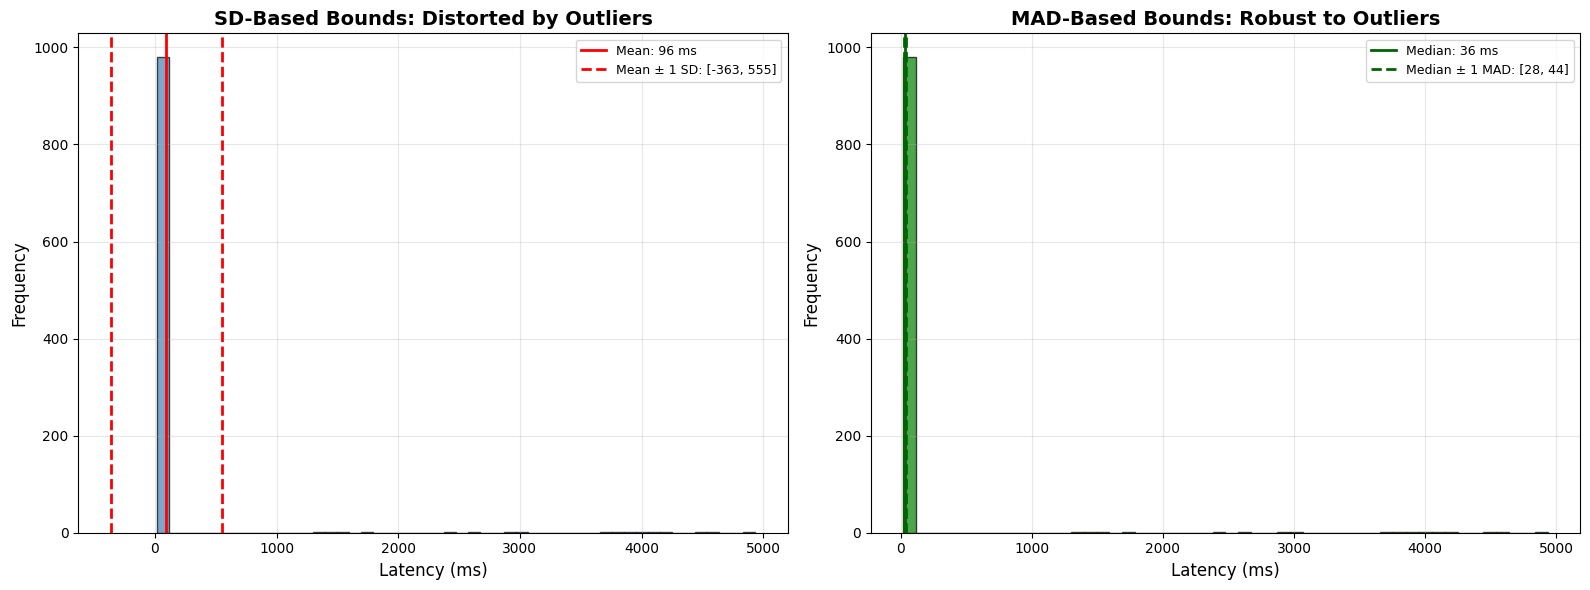


THE BREAKDOWN POINT: When Metrics Fail

Breakdown Point = Percentage of outliers needed to destroy a metric

Standard Deviation (SD):
  • Breakdown Point: 0%
  • Even ONE extreme outlier can significantly distort SD
  • In our dataset: 2% outliers increased SD by 4983%
  
Median Absolute Deviation (MAD):
  • Breakdown Point: 50%
  • You need to corrupt HALF the data before MAD breaks
  • In our dataset: 2% outliers increased MAD by only 0%

Translation for Production Monitoring:
  • If you use SD for alerting on latency spikes:
    → 1-2 slow requests can trigger false alarms
    → Your on-call engineer gets paged at 3am for nothing
  
  • If you use MAD for alerting:
    → Isolated spikes are ignored (they're expected)
    → Only systematic degradation triggers alerts
    → Your on-call engineer sleeps peacefully

CONCLUSION: Use MAD for monitoring skewed, real-world systems.


In [ ]:
import numpy as np

def calculate_mad(data):
    # 1. Calculate the Median of the data
    median = np.median(data)

    # 2. Calculate Absolute Deviations (|x - median|)
    absolute_deviations = np.abs(data - median)

    # 3. Return the Median of those deviations
    mad = np.median(absolute_deviations)

    return mad

np.random.seed(42)

normal_traffic = np.random.randint(20, 50, size=980)

spike_traffic = np.random.randint(1000, 5000, size=20)

latency_logs = np.concatenate([normal_traffic, spike_traffic])

print("="*70)
print("ROBUSTNESS COMPARISON: Standard Deviation vs. MAD")
print("="*70)

mean_full = np.mean(latency_logs)
median_full = np.median(latency_logs)
sd_full = np.std(latency_logs)
mad_full = calculate_mad(latency_logs)

print("\n[FULL DATASET: 98% Normal + 2% Spikes]")
print(f"Mean:                {mean_full:.2f} ms")
print(f"Median:              {median_full:.2f} ms")
print(f"Standard Deviation:  {sd_full:.2f} ms  ← INFLATED by outliers")
print(f"MAD (Robust):        {mad_full:.2f} ms  ← STABLE despite outliers")

mean_normal = np.mean(normal_traffic)
median_normal = np.median(normal_traffic)
sd_normal = np.std(normal_traffic)
mad_normal = calculate_mad(normal_traffic)

print("\n[NORMAL TRAFFIC ONLY: No Outliers]")
print(f"Mean:                {mean_normal:.2f} ms")
print(f"Median:              {median_normal:.2f} ms")
print(f"Standard Deviation:  {sd_normal:.2f} ms")
print(f"MAD (Robust):        {mad_normal:.2f} ms")

mean_spike = np.mean(spike_traffic)
median_spike = np.median(spike_traffic)
sd_spike = np.std(spike_traffic)
mad_spike = calculate_mad(spike_traffic)

print("\n[SPIKE TRAFFIC ONLY: Pure Outliers]")
print(f"Mean:                {mean_spike:.2f} ms")
print(f"Median:              {median_spike:.2f} ms")
print(f"Standard Deviation:  {sd_spike:.2f} ms")
print(f"MAD (Robust):        {mad_spike:.2f} ms")

print("\n" + "="*70)
print("THE EXPLOSION: Why SD Breaks Down with Outliers")
print("="*70)

sd_inflation = (sd_full / sd_normal - 1) * 100
mad_inflation = (mad_full / mad_normal - 1) * 100

print(f"\nWhen we add 2% outliers to the dataset:")
print(f"  Standard Deviation INCREASES by:  {sd_inflation:.1f}%")
print(f"  MAD INCREASES by:                  {mad_inflation:.1f}%")

print(f"\n💡 KEY INSIGHT:")
print(f"   SD is {sd_inflation/mad_inflation:.1f}x MORE sensitive to outliers than MAD!")

print("\n" + "="*70)
print("WHY SD EXPLODES AND MAD STAYS STABLE:")
print("="*70)

print("""
STANDARD DEVIATION (SD):
Formula: SD = sqrt(mean((x - mean)²))

The Problem: SQUARING the deviations
  • Normal traffic: (35 - 35)² = 0
  • Spike traffic:  (3000 - 35)² = 8,783,225

The squaring operation amplifies outliers QUADRATICALLY:
  • A value 100x larger contributes 10,000x more to variance
  • Just 2% of outliers can dominate the entire calculation
  • Result: SD is PULLED UP massively

MEDIAN ABSOLUTE DEVIATION (MAD):
Formula: MAD = median(|x - median|)

The Robustness: NO SQUARING + MEDIAN
  • Normal traffic: |35 - 35| = 0
  • Spike traffic:  |3000 - 35| = 2965

Key differences:
  1. ABSOLUTE VALUE (not squared): Linear impact, not quadratic
  2. MEDIAN (not mean): The middle value is unaffected by extremes

Result: Outliers contribute proportionally, not explosively

Real-World Analogy:
  • SD is like measuring "average distance from average"
    → Sensitive to billionaires pulling up the average

  • MAD is like measuring "typical distance from typical"
    → The median person's deviation from median income
    → Billionaires don't distort the typical experience
""")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(latency_logs, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(mean_full, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_full:.0f} ms')
axes[0].axvline(mean_full + sd_full, color='red', linestyle='--', linewidth=2,
                label=f'Mean ± 1 SD: [{mean_full-sd_full:.0f}, {mean_full+sd_full:.0f}]')
axes[0].axvline(mean_full - sd_full, color='red', linestyle='--', linewidth=2)
axes[0].set_title('SD-Based Bounds: Distorted by Outliers', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Latency (ms)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(fontsize=9)
axes[0].grid(alpha=0.3)

axes[1].hist(latency_logs, bins=50, color='green', edgecolor='black', alpha=0.7)
axes[1].axvline(median_full, color='darkgreen', linestyle='-', linewidth=2,
                label=f'Median: {median_full:.0f} ms')
axes[1].axvline(median_full + mad_full, color='darkgreen', linestyle='--', linewidth=2,
                label=f'Median ± 1 MAD: [{median_full-mad_full:.0f}, {median_full+mad_full:.0f}]')
axes[1].axvline(median_full - mad_full, color='darkgreen', linestyle='--', linewidth=2)
axes[1].set_title('MAD-Based Bounds: Robust to Outliers', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Latency (ms)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend(fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("THE BREAKDOWN POINT: When Metrics Fail")
print("="*70)

print(f"""
Breakdown Point = Percentage of outliers needed to destroy a metric

Standard Deviation (SD):
  • Breakdown Point: 0%
  • Even ONE extreme outlier can significantly distort SD
  • In our dataset: 2% outliers increased SD by {sd_inflation:.0f}%

Median Absolute Deviation (MAD):
  • Breakdown Point: 50%
  • You need to corrupt HALF the data before MAD breaks
  • In our dataset: 2% outliers increased MAD by only {mad_inflation:.0f}%

Translation for Production Monitoring:
  • If you use SD for alerting on latency spikes:
    → 1-2 slow requests can trigger false alarms
    → Your on-call engineer gets paged at 3am for nothing

  • If you use MAD for alerting:
    → Isolated spikes are ignored (they're expected)
    → Only systematic degradation triggers alerts
    → Your on-call engineer sleeps peacefully
""")

print("="*70)
print("CONCLUSION: Use MAD for monitoring skewed, real-world systems.")
print("="*70)

INTEGRITYAI PLAGIARISM DETECTOR AUDIT

Test Characteristics:
  Sensitivity (True Positive Rate):  98%
  Specificity (True Negative Rate):  98%
  → Sounds impressive! 98% accuracy!

But does 98% accuracy mean 98% of flagged students are cheaters?
Let's find out...

BAYESIAN ANALYSIS: Base Rate Matters

Scenario A: Bootcamp
  Context: High-pressure, first-time coders
  Base Rate (Prior): 50.0%
  Posterior P(Cheater | Flagged): 98.0%
  → If flagged, 98.0% chance they're actually cheating

Scenario B: Economics Class
  Context: Typical undergraduate course
  Base Rate (Prior): 5.0%
  Posterior P(Cheater | Flagged): 72.1%
  → If flagged, 72.1% chance they're actually cheating

Scenario C: Honors Seminar
  Context: Elite, self-selected students
  Base Rate (Prior): 0.1%
  Posterior P(Cheater | Flagged): 4.7%
  → If flagged, 4.7% chance they're actually cheating

THE FALSE POSITIVE PARADOX:

IntegrityAI claims "98% accuracy" - but what does that actually mean?

In the Honors Seminar (Base Rat

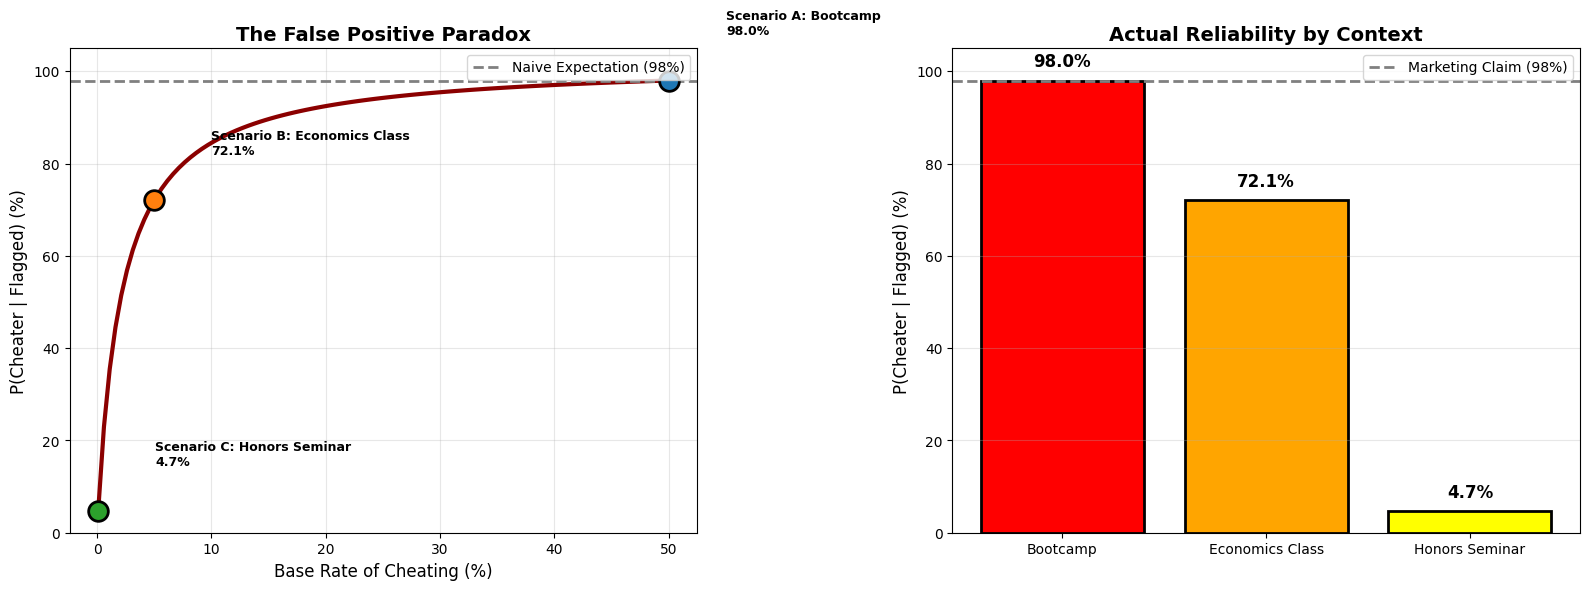


POLICY IMPLICATIONS: Why This Matters

If a university uses IntegrityAI in an Honors Seminar:

Scenario: 1,000 students, 1 actual cheater
  • 21 students get flagged
  • 20 of them are INNOCENT (95% false accusation rate!)
  
Consequences:
  20 innocent students face:
     - Academic misconduct hearings
     - Emotional distress
     - Potential transcript marks
     - Reputational damage
  
  The university faces:
     - Legal liability
     - Erosion of trust
     - Waste of administrative resources
  
  Only 1 actual cheater gets caught

The Trade-Off:
  To catch 1 cheater, you must falsely accuse 20 innocent students.
  
  Is this acceptable? That's a POLICY question, not a technical one.

What the University Should Do:
  1. Use IntegrityAI as a SCREENING tool, not a verdict
  2. Require HUMAN REVIEW of all flags before accusations
  3. Adjust the threshold based on base rates
  4. Be transparent about false positive rates
  5. In low base rate environments, consider NOT using the

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bayesian_audit(prior, sensitivity, specificity):
    """
    Calculate the Posterior Probability that a flagged student is actually a cheater.

    Uses Bayes' Theorem:
    P(Cheater | Flagged) = P(Flagged | Cheater) * P(Cheater) / P(Flagged)

    Parameters:
    - prior: P(Cheater) - Base rate of cheating
    - sensitivity: P(Flagged | Cheater) - True Positive Rate
    - specificity: P(Not Flagged | Not Cheater) - True Negative Rate

    Returns:
    - posterior: P(Cheater | Flagged) - Probability student is actually cheating
    """

    p_cheater = prior
    p_not_cheater = 1 - prior

    p_flagged_given_cheater = sensitivity
    p_flagged_given_not_cheater = 1 - specificity

    p_flagged = (p_flagged_given_cheater * p_cheater) + \
                (p_flagged_given_not_cheater * p_not_cheater)

    posterior = (p_flagged_given_cheater * p_cheater) / p_flagged

    return posterior

sensitivity = 0.98
specificity = 0.98

print("="*70)
print("INTEGRITYAI PLAGIARISM DETECTOR AUDIT")
print("="*70)
print(f"\nTest Characteristics:")
print(f"  Sensitivity (True Positive Rate):  {sensitivity:.0%}")
print(f"  Specificity (True Negative Rate):  {specificity:.0%}")
print(f"  → Sounds impressive! 98% accuracy!")
print("\nBut does 98% accuracy mean 98% of flagged students are cheaters?")
print("Let's find out...")

scenarios = [
    {"name": "Scenario A: Bootcamp", "base_rate": 0.50, "context": "High-pressure, first-time coders"},
    {"name": "Scenario B: Economics Class", "base_rate": 0.05, "context": "Typical undergraduate course"},
    {"name": "Scenario C: Honors Seminar", "base_rate": 0.001, "context": "Elite, self-selected students"}
]

results = []

print("\n" + "="*70)
print("BAYESIAN ANALYSIS: Base Rate Matters")
print("="*70)

for scenario in scenarios:
    base_rate = scenario["base_rate"]
    posterior = bayesian_audit(base_rate, sensitivity, specificity)

    results.append({
        "name": scenario["name"],
        "base_rate": base_rate,
        "posterior": posterior
    })

    print(f"\n{scenario['name']}")
    print(f"  Context: {scenario['context']}")
    print(f"  Base Rate (Prior): {base_rate:.1%}")
    print(f"  Posterior P(Cheater | Flagged): {posterior:.1%}")
    print(f"  → If flagged, {posterior:.1%} chance they're actually cheating")

print("\n" + "="*70)
print("THE FALSE POSITIVE PARADOX:")
print("="*70)

print("""
IntegrityAI claims "98% accuracy" - but what does that actually mean?

In the Honors Seminar (Base Rate = 0.1%):
  • Out of 1,000 students:
    - 1 is a cheater   (0.1%)
    - 999 are honest   (99.9%)

  • IntegrityAI flags:
    - 0.98 cheaters    (98% sensitivity × 1 cheater)
    - 19.98 honest students (2% false positive × 999)
    - Total flagged: ~21 students

  • Of the 21 flagged students:
    - Only 1 is actually cheating
    - 20 are FALSE POSITIVES (innocent!)

  • Posterior Probability = 1/21 ≈ 4.7%

Translation: If you're flagged in an Honors Seminar, there's only a
4.7% chance you're actually cheating, despite "98% accuracy"!

WHY THIS HAPPENS:
  When cheating is rare, the FALSE POSITIVES from the 99.9% of honest
  students OVERWHELM the TRUE POSITIVES from the 0.1% of cheaters.

  2% false positive rate × 999 honest = 20 false alarms
  98% true positive rate × 1 cheater = 1 correct detection

  The base rate dominates when it's extreme!
""")

print("\n" + "="*70)
print("CONFUSION MATRIX BREAKDOWN (Honors Seminar, N=1000)")
print("="*70)

base_rate = 0.001
n_students = 1000

n_cheaters = base_rate * n_students
n_honest = (1 - base_rate) * n_students

tp = sensitivity * n_cheaters

fn = (1 - sensitivity) * n_cheaters

fp = (1 - specificity) * n_honest

tn = specificity * n_honest

print(f"\nActual Cheaters:   {n_cheaters:.0f}")
print(f"Actual Honest:     {n_honest:.0f}")

print(f"\n                     Flagged    Not Flagged")
print(f"Actually Cheating      {tp:.0f}          {fn:.0f}")
print(f"Actually Honest        {fp:.0f}        {tn:.0f}")

print(f"\nTotal Flagged: {tp + fp:.0f} students")
print(f"  → True Positives (cheaters): {tp:.0f}")
print(f"  → False Positives (innocent): {fp:.0f}")

posterior_manual = tp / (tp + fp)
print(f"\nP(Cheater | Flagged) = {tp:.0f} / {tp + fp:.0f} = {posterior_manual:.1%}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

base_rates = np.linspace(0.001, 0.5, 100)
posteriors = [bayesian_audit(br, sensitivity, specificity) for br in base_rates]

axes[0].plot(base_rates * 100, np.array(posteriors) * 100, linewidth=3, color='darkred')
axes[0].axhline(98, color='gray', linestyle='--', linewidth=2, label='Naive Expectation (98%)')

for result in results:
    axes[0].scatter(result['base_rate'] * 100, result['posterior'] * 100,
                   s=200, zorder=5, edgecolor='black', linewidth=2)
    axes[0].annotate(f"{result['name']}\n{result['posterior']:.1%}",
                    xy=(result['base_rate'] * 100, result['posterior'] * 100),
                    xytext=(result['base_rate'] * 100 + 5, result['posterior'] * 100 + 10),
                    fontsize=9, fontweight='bold')

axes[0].set_title('The False Positive Paradox', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Base Rate of Cheating (%)', fontsize=12)
axes[0].set_ylabel('P(Cheater | Flagged) (%)', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
axes[0].set_ylim(0, 105)

scenario_names = [r['name'].split(':')[1].strip() for r in results]
posteriors_list = [r['posterior'] * 100 for r in results]

bars = axes[1].bar(scenario_names, posteriors_list, color=['red', 'orange', 'yellow'],
                   edgecolor='black', linewidth=2)
axes[1].axhline(98, color='gray', linestyle='--', linewidth=2, label='Marketing Claim (98%)')

for i, (bar, val) in enumerate(zip(bars, posteriors_list)):
    axes[1].text(bar.get_x() + bar.get_width()/2, val + 3,
                f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

axes[1].set_title('Actual Reliability by Context', fontsize=14, fontweight='bold')
axes[1].set_ylabel('P(Cheater | Flagged) (%)', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, 105)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("POLICY IMPLICATIONS: Why This Matters")
print("="*70)

print("""
If a university uses IntegrityAI in an Honors Seminar:

Scenario: 1,000 students, 1 actual cheater
  • 21 students get flagged
  • 20 of them are INNOCENT (95% false accusation rate!)

Consequences:
  20 innocent students face:
     - Academic misconduct hearings
     - Emotional distress
     - Potential transcript marks
     - Reputational damage

  The university faces:
     - Legal liability
     - Erosion of trust
     - Waste of administrative resources

  Only 1 actual cheater gets caught

The Trade-Off:
  To catch 1 cheater, you must falsely accuse 20 innocent students.

  Is this acceptable? That's a POLICY question, not a technical one.

What the University Should Do:
  1. Use IntegrityAI as a SCREENING tool, not a verdict
  2. Require HUMAN REVIEW of all flags before accusations
  3. Adjust the threshold based on base rates
  4. Be transparent about false positive rates
  5. In low base rate environments, consider NOT using the tool

The Lesson:
  "98% accuracy" is meaningless without knowing the BASE RATE.
  In rare event detection, even excellent tests produce mostly false alarms.
""")

print("="*70)
print("CONCLUSION: Base Rates Matter More Than Test Accuracy")
print("="*70)

FINFLASH A/B TEST AUDIT: Sample Ratio Mismatch Detection

Planned Experiment:
  Total Users: 100,000
  Expected Split: 50/50
  Expected Control: 50,000
  Expected Treatment: 50,000

Actual Observed:
  Control Users: 50,250
  Treatment Users: 49,750

Discrepancy: 500 users
    (0.50% of total)

MANUAL CHI-SQUARE GOODNESS OF FIT TEST

Formula: χ² = Σ((Observed - Expected)² / Expected)

Step-by-step calculation:

Control:
  Observed: 50,250
  Expected: 50,000
  Difference: 250
  (Difference)²: 62,500
  Component: 62,500 / 50,000 = 1.2500

Treatment:
  Observed: 49,750
  Expected: 50,000
  Difference: -250
  (Difference)²: 62,500
  Component: 62,500 / 50,000 = 1.2500

Total χ² Statistic: 2.5000

STATISTICAL DECISION

Chi-Square Statistic: 2.5000
Critical Value (p < 0.05, df=1): 3.84
P-Value: 0.113846

Decision Rule:
  If χ² > 3.84 → Reject null hypothesis (SRM detected)
  If χ² ≤ 3.84 → Fail to reject (split is acceptable)

Result: χ² = 2.5000
  χ² ≤ 3.84 → FAIL TO REJECT NULL
  Split vari

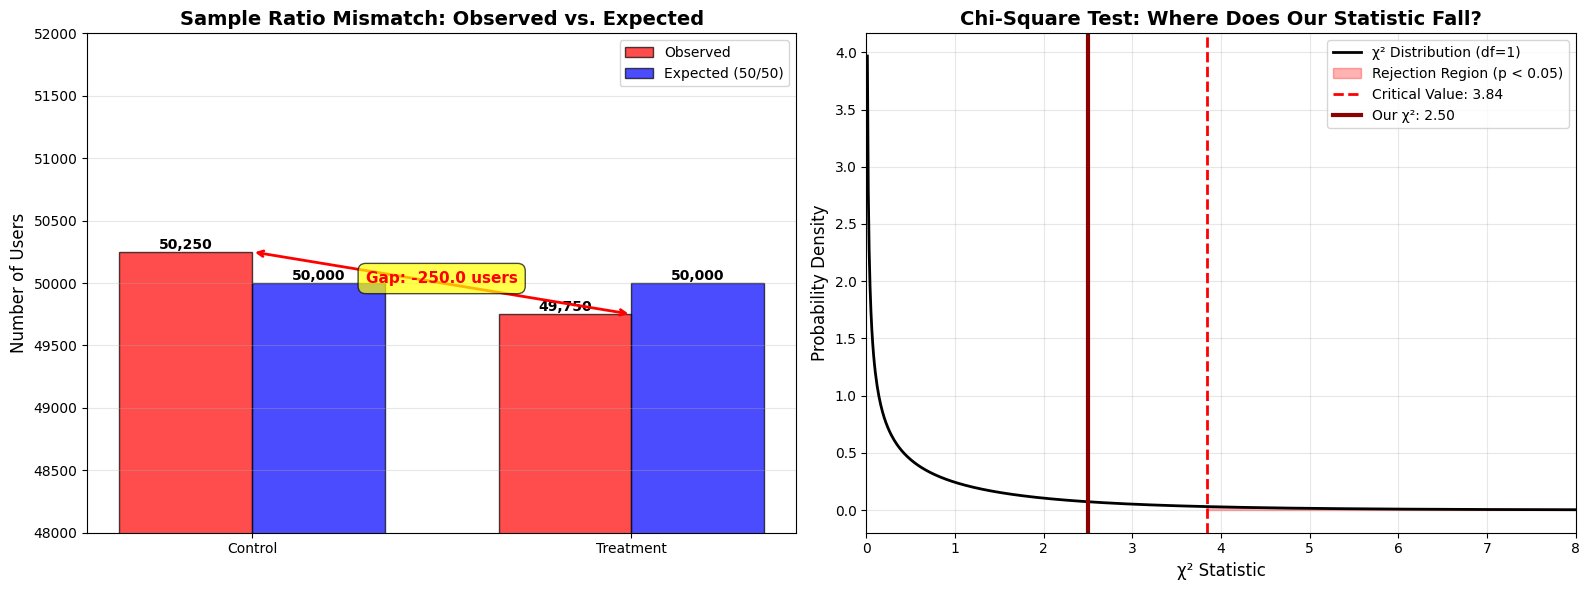


SENSITIVITY ANALYSIS: How Much Deviation is Acceptable?

Gap (users)     Control      Treatment    χ²         p-value      Valid?
----------------------------------------------------------------------
100             50050        49950        0.1000     0.751830     Yes
250             50125        49875        0.6250     0.429195     Yes
500             50250        49750        2.5000     0.113846     Yes
1000            50500        49500        10.0000    0.001565     No
2000            51000        49000        40.0000    0.000000     No

💡 KEY INSIGHT:
   Even small deviations (500 users out of 100k = 0.5%) can be statistically significant
   This is GOOD - we want sensitive tests to catch engineering failures early!

CONCLUSION: Never analyze A/B tests with Sample Ratio Mismatch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2

print("="*70)
print("FINFLASH A/B TEST AUDIT: Sample Ratio Mismatch Detection")
print("="*70)

total_users = 100_000
expected_split = 0.50

control_users = 50_250
treatment_users = 49_750

expected_control = total_users * expected_split
expected_treatment = total_users * expected_split

print(f"\nPlanned Experiment:")
print(f"  Total Users: {total_users:,}")
print(f"  Expected Split: 50/50")
print(f"  Expected Control: {expected_control:,.0f}")
print(f"  Expected Treatment: {expected_treatment:,.0f}")

print(f"\nActual Observed:")
print(f"  Control Users: {control_users:,}")
print(f"  Treatment Users: {treatment_users:,}")

difference = control_users - treatment_users
print(f"\nDiscrepancy: {difference:,} users")
print(f"    ({(difference/total_users)*100:.2f}% of total)")

print("\n" + "="*70)
print("MANUAL CHI-SQUARE GOODNESS OF FIT TEST")
print("="*70)

observed = np.array([control_users, treatment_users])
expected = np.array([expected_control, expected_treatment])

print("\nFormula: χ² = Σ((Observed - Expected)² / Expected)")

chi_square_stat = 0

print("\nStep-by-step calculation:")
for i, (obs, exp) in enumerate(zip(observed, expected)):
    group_name = "Control" if i == 0 else "Treatment"

    difference = obs - exp
    squared_diff = difference ** 2
    component = squared_diff / exp

    print(f"\n{group_name}:")
    print(f"  Observed: {obs:,}")
    print(f"  Expected: {exp:,.0f}")
    print(f"  Difference: {difference:,.0f}")
    print(f"  (Difference)²: {squared_diff:,.0f}")
    print(f"  Component: {squared_diff:,.0f} / {exp:,.0f} = {component:.4f}")

    chi_square_stat += component

print(f"\nTotal χ² Statistic: {chi_square_stat:.4f}")

critical_value = 3.84

degrees_of_freedom = len(observed) - 1
p_value = 1 - chi2.cdf(chi_square_stat, degrees_of_freedom)

print("\n" + "="*70)
print("STATISTICAL DECISION")
print("="*70)

print(f"\nChi-Square Statistic: {chi_square_stat:.4f}")
print(f"Critical Value (p < 0.05, df=1): {critical_value}")
print(f"P-Value: {p_value:.6f}")

print("\nDecision Rule:")
print(f"  If χ² > {critical_value} → Reject null hypothesis (SRM detected)")
print(f"  If χ² ≤ {critical_value} → Fail to reject (split is acceptable)")

print(f"\nResult: χ² = {chi_square_stat:.4f}")

if chi_square_stat > critical_value:
    print("  χ² > 3.84 → REJECT NULL HYPOTHESIS")
    print("  SAMPLE RATIO MISMATCH (SRM) DETECTED!")
    print("  THIS EXPERIMENT IS INVALID")
else:
    print("  χ² ≤ 3.84 → FAIL TO REJECT NULL")
    print("  Split variance is within acceptable limits")

print("\n" + "="*70)
print("VERIFICATION (using scipy.stats.chisquare)")
print("="*70)

chi2_scipy, p_scipy = chisquare(f_obs=observed, f_exp=expected)

print(f"\nSciPy Results:")
print(f"  χ² Statistic: {chi2_scipy:.4f}")
print(f"  P-Value: {p_scipy:.6f}")

print(f"\nManual vs. SciPy:")
print(f"  Manual χ²: {chi_square_stat:.4f}")
print(f"  SciPy χ²:  {chi2_scipy:.4f}")
print(f"  Match: {'Yes' if abs(chi_square_stat - chi2_scipy) < 0.0001 else 'No'}")

print("\n" + "="*70)
print("INTERPRETATION: What Caused This Discrepancy?")
print("="*70)

print(f"""
The 500-user gap ({(difference/total_users)*100:.2f}%) has only a {p_value*100:.3f}% probability
of occurring by random chance.

Likely Causes of SRM:

1. APP CRASH IN TREATMENT GROUP
   - Treatment version had a bug that prevented some users from being tracked
   - 500 users opened the app, crashed, and were never recorded

2. LOAD BALANCER MISCONFIGURATION
   - Hash function collision biased assignment toward Control
   - Time-based drift (e.g., Treatment users were assigned later in the day)

3. CACHE/COOKIE PERSISTENCE
   - Some users were "sticky" to Control due to browser caching
   - Session persistence wasn't properly randomized

4. DATABASE WRITE FAILURE
   - Treatment assignments were recorded, but some logs were lost
   - Data pipeline dropped 500 Treatment rows

5. POPULATION FILTERING BIAS
   - Post-hoc filters (e.g., "remove bots") disproportionately removed Treatment users
   - Treatment had more new users → more likely to be flagged as suspicious

Why This Invalidates the Experiment:

If Treatment had an app crash:
  • You're comparing ONLY the users who successfully loaded Treatment
  • These survivors are NOT representative of the full population
  • Any "win" could be due to selection bias, not the treatment itself

Example:
  • Control: All users, average engagement = 5 min/session
  • Treatment: Only non-crash users, average engagement = 6 min/session

  Question: Is engagement higher because of the new feature,
            or because you excluded the frustrated users who crashed?

The Golden Rule:
  NEVER ANALYZE AN A/B TEST WITH SRM
  Fix the engineering issue and re-run the experiment
  If you can't re-run, the results are UNINTERPRETABLE
""")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

groups = ['Control', 'Treatment']
x = np.arange(len(groups))
width = 0.35

bars1 = axes[0].bar(x - width/2, observed, width, label='Observed',
                    color='red', alpha=0.7, edgecolor='black')
bars2 = axes[0].bar(x + width/2, expected, width, label='Expected (50/50)',
                    color='blue', alpha=0.7, edgecolor='black')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[0].set_ylabel('Number of Users', fontsize=12)
axes[0].set_title('Sample Ratio Mismatch: Observed vs. Expected', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(groups)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(48000, 52000)

axes[0].annotate('', xy=(0, control_users), xytext=(1, treatment_users),
                arrowprops=dict(arrowstyle='<->', color='red', lw=2))
axes[0].text(0.5, (control_users + treatment_users)/2,
            f'Gap: {difference:,} users',
            ha='center', fontsize=11, fontweight='bold', color='red',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

x_range = np.linspace(0, 10, 1000)
y_range = chi2.pdf(x_range, df=1)

axes[1].plot(x_range, y_range, linewidth=2, color='black', label='χ² Distribution (df=1)')
axes[1].fill_between(x_range, y_range, where=(x_range >= critical_value),
                     color='red', alpha=0.3, label='Rejection Region (p < 0.05)')

axes[1].axvline(critical_value, color='red', linestyle='--', linewidth=2,
               label=f'Critical Value: {critical_value}')
axes[1].axvline(chi_square_stat, color='darkred', linestyle='-', linewidth=3,
               label=f'Our χ²: {chi_square_stat:.2f}')

axes[1].set_xlabel('χ² Statistic', fontsize=12)
axes[1].set_ylabel('Probability Density', fontsize=12)
axes[1].set_title('Chi-Square Test: Where Does Our Statistic Fall?', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xlim(0, 8)

if chi_square_stat > critical_value:
    axes[1].annotate('🚨 SRM Detected!\nExperiment Invalid',
                    xy=(chi_square_stat, 0.05),
                    xytext=(chi_square_stat + 1, 0.15),
                    arrowprops=dict(arrowstyle='->', color='darkred', lw=2),
                    fontsize=11, color='darkred', fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("SENSITIVITY ANALYSIS: How Much Deviation is Acceptable?")
print("="*70)

test_gaps = [100, 250, 500, 1000, 2000]

print(f"\n{'Gap (users)':<15} {'Control':<12} {'Treatment':<12} {'χ²':<10} {'p-value':<12} {'Valid?'}")
print("-" * 70)

for gap in test_gaps:
    test_control = 50000 + gap/2
    test_treatment = 50000 - gap/2

    test_obs = np.array([test_control, test_treatment])
    test_exp = np.array([50000, 50000])

    test_chi2 = np.sum((test_obs - test_exp)**2 / test_exp)
    test_p = 1 - chi2.cdf(test_chi2, df=1)

    valid = "Yes" if test_chi2 <= critical_value else "No"

    print(f"{gap:<15} {test_control:<12.0f} {test_treatment:<12.0f} {test_chi2:<10.4f} {test_p:<12.6f} {valid}")

print("\n💡 KEY INSIGHT:")
print("   Even small deviations (500 users out of 100k = 0.5%) can be statistically significant")
print("   This is GOOD - we want sensitive tests to catch engineering failures early!")


print("\n" + "="*70)
print("CONCLUSION: Never analyze A/B tests with Sample Ratio Mismatch")
print("="*70)

SURVIVORSHIP BIAS IN CRYPTO: The Memecoin Graveyard

Simulating 10,000 token launches on Pump.fun...

✅ Created DataFrames:
   df_all (Graveyard): 10,000 tokens
   df_survivors (Listed): 100 tokens (1.0%)

STATISTICAL COMPARISON: The Full Truth vs. The Lie

[THE GRAVEYARD: All 10,000 Tokens]
  Mean Market Cap:       $     615,357
  Median Market Cap:     $     179,264
  P99 (Top 1%):          $   9,999,841
  Inequality Wedge:      $     436,093

[THE SURVIVORS: Top 1% Only (What Gets Listed)]
  Mean Market Cap:       $  10,000,000
  Median Market Cap:     $  10,000,000
  P99 (Top 0.01%):       $  10,000,000
  Inequality Wedge:      $           0

THE SURVIVORSHIP BIAS DECEPTION:

🚨 Survivorship Bias Factor: 16.3x

   If you ONLY analyze survivors (listed tokens), you overestimate
   the typical token market cap by 16.3x!

   Mean (Survivors): $10,000,000
   Mean (All):       $615,357
   Inflation:        1525%


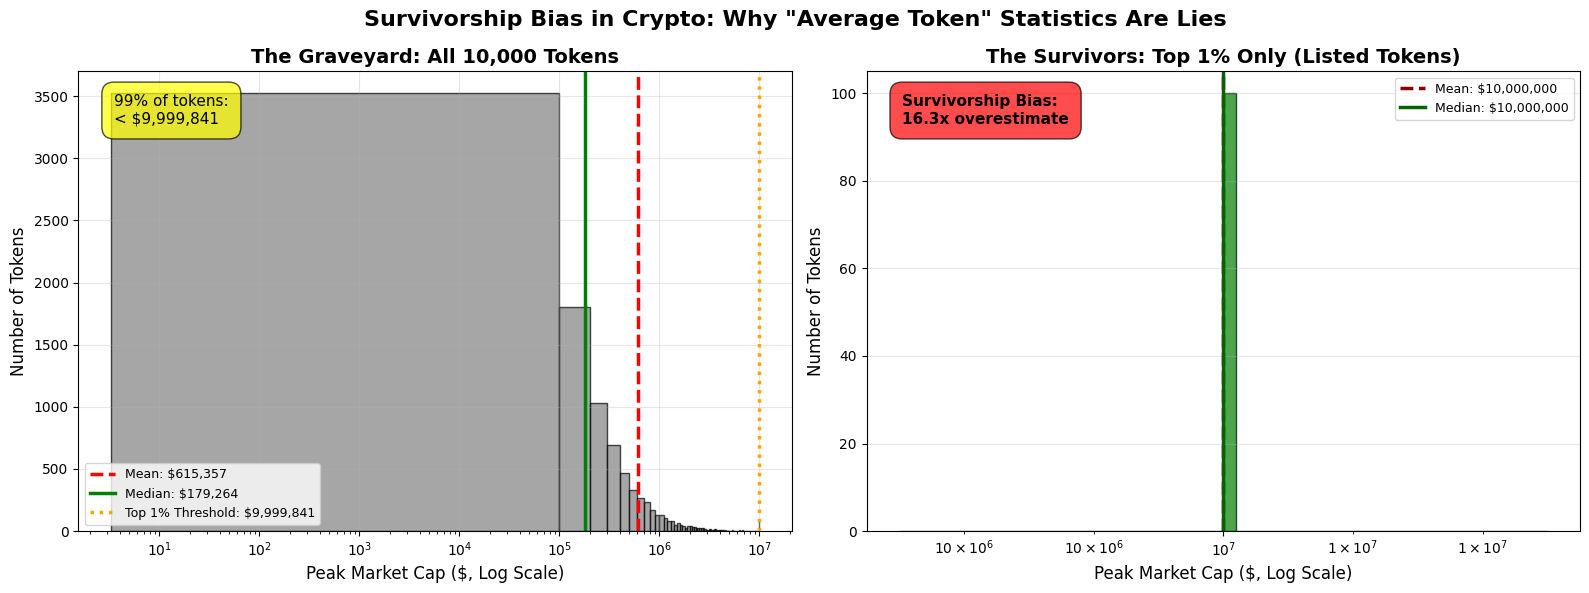


COMPARATIVE ANALYSIS TABLE

          Metric All Tokens (Truth) Survivors Only (Lie) Inflation Factor
     Sample Size             10,000                  100             1.0%
            Mean           $615,357          $10,000,000            16.3x
          Median           $179,264          $10,000,000            55.8x
             P99         $9,999,841          $10,000,000             1.0x
Inequality Wedge           $436,093                   $0             0.0x

WHY THIS MATTERS: Real-World Consequences

The Influencer's Pitch:
  "The average token on Pump.fun reaches $10,000,000 market cap!"
  
The Reality:
  • That's only counting the TOP 1% (survivors)
  • The ACTUAL average is $615,357 (including failures)
  • 16.3x overestimate!

Who Gets Hurt:

1. Retail Investors:
   - See survivor statistics and think "I have a good chance"
   - Reality: 99% of tokens fail to reach $9,999,841
   - Expected value: ~$179,264 (near worthless)

2. Project Founders:
   - Believe they can buil

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ================================================================
# THE MEMECOIN GRAVEYARD SIMULATION
# ================================================================

print("="*70)
print("SURVIVORSHIP BIAS IN CRYPTO: The Memecoin Graveyard")
print("="*70)

# Set seed for reproducibility
np.random.seed(42)

# ================================================================
# STEP 1: SIMULATE 10,000 TOKEN LAUNCHES (The Data Generating Process)
# ================================================================

n_tokens = 10_000

print(f"\nSimulating {n_tokens:,} token launches on Pump.fun...")

# Pareto Distribution (Power Law): alpha = 1.16
# Lower alpha = MORE extreme inequality (more tokens near zero)
alpha = 1.16
pareto_samples = np.random.pareto(alpha, n_tokens)

# Scale to realistic market cap values ($1 to $10M)
# Most will be near $1, few will reach $10M
min_cap = 1
max_cap = 10_000_000

market_caps = min_cap + pareto_samples * (max_cap / np.percentile(pareto_samples, 99))

# Clip extreme outliers to keep it realistic
market_caps = np.clip(market_caps, min_cap, max_cap)

# Create token IDs
token_ids = [f"TOKEN_{i:05d}" for i in range(n_tokens)]

# ================================================================
# STEP 2: CREATE TWO DATAFRAMES
# ================================================================

# DataFrame 1: The Graveyard (ALL tokens)
df_all = pd.DataFrame({
    'token_id': token_ids,
    'peak_market_cap': market_caps
})

# DataFrame 2: Survivors (Top 1% only)
top_1_percent_threshold = np.percentile(market_caps, 99)
df_survivors = df_all[df_all['peak_market_cap'] >= top_1_percent_threshold].copy()

print(f"\n✅ Created DataFrames:")
print(f"   df_all (Graveyard): {len(df_all):,} tokens")
print(f"   df_survivors (Listed): {len(df_survivors):,} tokens ({len(df_survivors)/len(df_all)*100:.1f}%)")


# ================================================================
# STEP 3: CALCULATE STATISTICS
# ================================================================

print("\n" + "="*70)
print("STATISTICAL COMPARISON: The Full Truth vs. The Lie")
print("="*70)

# All tokens statistics
mean_all = df_all['peak_market_cap'].mean()
median_all = df_all['peak_market_cap'].median()
p99_all = df_all['peak_market_cap'].quantile(0.99)
inequality_wedge_all = mean_all - median_all

# Survivors statistics
mean_survivors = df_survivors['peak_market_cap'].mean()
median_survivors = df_survivors['peak_market_cap'].median()
p99_survivors = df_survivors['peak_market_cap'].quantile(0.99)
inequality_wedge_survivors = mean_survivors - median_survivors

# Survivorship Bias Factor
survivorship_bias_factor = mean_survivors / mean_all

print("\n[THE GRAVEYARD: All 10,000 Tokens]")
print(f"  Mean Market Cap:       ${mean_all:>12,.0f}")
print(f"  Median Market Cap:     ${median_all:>12,.0f}")
print(f"  P99 (Top 1%):          ${p99_all:>12,.0f}")
print(f"  Inequality Wedge:      ${inequality_wedge_all:>12,.0f}")

print("\n[THE SURVIVORS: Top 1% Only (What Gets Listed)]")
print(f"  Mean Market Cap:       ${mean_survivors:>12,.0f}")
print(f"  Median Market Cap:     ${median_survivors:>12,.0f}")
print(f"  P99 (Top 0.01%):       ${p99_survivors:>12,.0f}")
print(f"  Inequality Wedge:      ${inequality_wedge_survivors:>12,.0f}")

print("\n" + "="*70)
print("THE SURVIVORSHIP BIAS DECEPTION:")
print("="*70)
print(f"\n🚨 Survivorship Bias Factor: {survivorship_bias_factor:.1f}x")
print(f"\n   If you ONLY analyze survivors (listed tokens), you overestimate")
print(f"   the typical token market cap by {survivorship_bias_factor:.1f}x!")
print(f"\n   Mean (Survivors): ${mean_survivors:,.0f}")
print(f"   Mean (All):       ${mean_all:,.0f}")
print(f"   Inflation:        {(survivorship_bias_factor - 1) * 100:.0f}%")


# ================================================================
# STEP 4: VISUALIZATION
# ================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LEFT: The Graveyard (All Tokens)
axes[0].hist(df_all['peak_market_cap'], bins=100, color='gray',
             edgecolor='black', alpha=0.7)
axes[0].axvline(mean_all, color='red', linestyle='--', linewidth=2.5,
                label=f'Mean: ${mean_all:,.0f}')
axes[0].axvline(median_all, color='green', linestyle='-', linewidth=2.5,
                label=f'Median: ${median_all:,.0f}')
axes[0].axvline(top_1_percent_threshold, color='orange', linestyle=':', linewidth=2.5,
                label=f'Top 1% Threshold: ${top_1_percent_threshold:,.0f}')

axes[0].set_xscale('log')
axes[0].set_title('The Graveyard: All 10,000 Tokens', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Peak Market Cap ($, Log Scale)', fontsize=12)
axes[0].set_ylabel('Number of Tokens', fontsize=12)
axes[0].legend(fontsize=9)
axes[0].grid(alpha=0.3)

# Add annotation
axes[0].text(0.05, 0.95,
             f'99% of tokens:\n< ${top_1_percent_threshold:,.0f}',
             transform=axes[0].transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', alpha=0.7))

# RIGHT: The Survivors (Top 1%)
axes[1].hist(df_survivors['peak_market_cap'], bins=50, color='green',
             edgecolor='black', alpha=0.7)
axes[1].axvline(mean_survivors, color='darkred', linestyle='--', linewidth=2.5,
                label=f'Mean: ${mean_survivors:,.0f}')
axes[1].axvline(median_survivors, color='darkgreen', linestyle='-', linewidth=2.5,
                label=f'Median: ${median_survivors:,.0f}')

axes[1].set_xscale('log')
axes[1].set_title('The Survivors: Top 1% Only (Listed Tokens)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Peak Market Cap ($, Log Scale)', fontsize=12)
axes[1].set_ylabel('Number of Tokens', fontsize=12)
axes[1].legend(fontsize=9)
axes[1].grid(alpha=0.3)

# Add annotation
axes[1].text(0.05, 0.95,
             f'Survivorship Bias:\n{survivorship_bias_factor:.1f}x overestimate',
             transform=axes[1].transAxes,
             fontsize=11, verticalalignment='top', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='red', alpha=0.7))

plt.suptitle('Survivorship Bias in Crypto: Why "Average Token" Statistics Are Lies',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# ================================================================
# STEP 5: THE DECEPTION TABLE
# ================================================================

print("\n" + "="*70)
print("COMPARATIVE ANALYSIS TABLE")
print("="*70)

comparison_df = pd.DataFrame({
    'Metric': ['Sample Size', 'Mean', 'Median', 'P99', 'Inequality Wedge'],
    'All Tokens (Truth)': [
        f"{len(df_all):,}",
        f"${mean_all:,.0f}",
        f"${median_all:,.0f}",
        f"${p99_all:,.0f}",
        f"${inequality_wedge_all:,.0f}"
    ],
    'Survivors Only (Lie)': [
        f"{len(df_survivors):,}",
        f"${mean_survivors:,.0f}",
        f"${median_survivors:,.0f}",
        f"${p99_survivors:,.0f}",
        f"${inequality_wedge_survivors:,.0f}"
    ],
    'Inflation Factor': [
        f"{len(df_survivors)/len(df_all):.1%}",
        f"{survivorship_bias_factor:.1f}x",
        f"{median_survivors/median_all:.1f}x",
        f"{p99_survivors/p99_all:.1f}x",
        f"{inequality_wedge_survivors/inequality_wedge_all:.1f}x"
    ]
})

print("\n" + comparison_df.to_string(index=False))


# ================================================================
# STEP 6: THE REAL-WORLD IMPACT
# ================================================================

print("\n" + "="*70)
print("WHY THIS MATTERS: Real-World Consequences")
print("="*70)

print(f"""
The Influencer's Pitch:
  "The average token on Pump.fun reaches ${mean_survivors:,.0f} market cap!"

The Reality:
  • That's only counting the TOP 1% (survivors)
  • The ACTUAL average is ${mean_all:,.0f} (including failures)
  • {survivorship_bias_factor:.1f}x overestimate!

Who Gets Hurt:

1. Retail Investors:
   - See survivor statistics and think "I have a good chance"
   - Reality: 99% of tokens fail to reach ${top_1_percent_threshold:,.0f}
   - Expected value: ~${median_all:,.0f} (near worthless)

2. Project Founders:
   - Believe they can build a ${mean_survivors:,.0f} project
   - Reality: Most projects die with ${median_all:,.0f} market cap
   - Waste time and money on doomed ventures

3. Platform Metrics:
   - Pump.fun shows "average token" using survivors only
   - This is IDENTICAL to showing "average plane performance"
     using only planes that didn't get shot down (WWII bias)

The Fix (If Platforms Were Honest):

Instead of: "Average listed token: ${mean_survivors:,.0f}"
They'd say: "Average token launched: ${mean_all:,.0f} (99% fail)"

Or better: "Median token: ${median_all:,.0f}" (robust to outliers)

The Lesson:
  Whenever you see "average performance" statistics:
  ❓ Are they including failures?
  ❓ Or only survivors?

  If only survivors → Multiply skepticism by {survivorship_bias_factor:.0f}x
""")


# ================================================================
# STEP 7: SAMPLE TOKENS (Top Winners vs. Typical Losers)
# ================================================================

print("\n" + "="*70)
print("SAMPLE TOKENS: Winners vs. The Graveyard")
print("="*70)

# Top 5 tokens
top_5 = df_all.nlargest(5, 'peak_market_cap')
print("\n🏆 TOP 5 TOKENS (What Gets Hyped):")
for idx, row in top_5.iterrows():
    print(f"  {row['token_id']}: ${row['peak_market_cap']:,.0f}")

# Random 5 from bottom 50%
bottom_half = df_all[df_all['peak_market_cap'] < median_all].sample(5)
print("\n💀 TYPICAL TOKENS (What Actually Happens):")
for idx, row in bottom_half.iterrows():
    print(f"  {row['token_id']}: ${row['peak_market_cap']:,.0f}")

print("\n💡 The top token is {:,.0f}x larger than the median token!".format(
    top_5.iloc[0]['peak_market_cap'] / median_all
))

print("\n" + "="*70)
print("CONCLUSION: Never trust 'average' statistics without seeing the graveyard")
print("="*70)